In [1]:
import pandas as pd
import os
import re
import numpy as np
from six.moves import xrange
import math
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

# Load Functions 

In [2]:
def dotproduct(v1, v2):
    return sum((a*b) for a, b in zip(v1, v2))

def length(v):
    return math.sqrt(dotproduct(v, v))

def abs_cos_vector1(v1, v2):
    return abs(dotproduct(v1, v2) / length(v2))

def calc_force(df):
    df['force'] = df['Fx']**2 + df['Fy']**2 + df['Fz']**2
    df['force'] = df['force'].pow(1/2)
    return df

def calc_velocity(df):
    df['velocity'] = df['Lx']**2 + df['Ly']**2 + df['Lz']
    df['velocity'] = df['velocity'].pow(1/2)
    return df
    
def calc_score(df, factor=2):
    df['score'] = df['front']*df['velocity']/factor
    return df

def time_to_sec(time):
    tmp = time.split(':')
    mins = tmp[0]
    secs = tmp[1]
    return timedelta(minutes=int(mins), seconds=int(secs)).total_seconds()

# Diagram 6.2: average score in the first day 
## (ordered by uid and strength of force)

In [3]:
data_dir = '../data/old_data/1_tag/'
filenames = os.listdir(data_dir)
df = pd.DataFrame()
for filename in filenames:
    data_path = data_dir + filename
    df_tmp = pd.read_csv(data_path)
    
    p_uid = '(^heika)(\d*)'
    result = re.match(p_uid, filename)
    uid = result.groups()[1]

#################### delete outliner ############################
    df_tmp = df_tmp.drop(['Force Input', 'Disturbance Force', 'Velocity','Distance'], axis=1)
#     if df_tmp['Fx.1'].sum()>0:
#         continue
#     if df_tmp['Fy.1'].sum()>0:
#         continue
#     if df_tmp['Fz.1'].sum()>0:
#         continue
#     df_tmp = df_tmp[df_tmp['Fx.1']<=0]
#     df_tmp = df_tmp[df_tmp['Fy.1']<=0]
#     df_tmp = df_tmp[df_tmp['Fz.1']<=0]

############# calc length of vector force ########################
    df_tmp['force'] = df_tmp['Fx']**2 + df_tmp['Fy']**2 + df_tmp['Fz']**2
#     df_tmp['force'] = (df_tmp['Fx']+df_tmp['Fx.1'])**2 + (df_tmp['Fy']+df_tmp['Fy.1'])**2 + (df_tmp['Fz']+df_tmp['Fz.1'])**2
    df_tmp['force'] = df_tmp['force'].pow(1/2)
#     df_tmp['disturbance_force'] = df_tmp['Fx.1']**2 + df_tmp['Fy.1']**2 + df_tmp['Fz.1']**2
#     df_tmp['disturbance_force'] = df_tmp['disturbance_force'].pow(1/2)

############# calc force projection on velocity ###############
#     force_3d = df_tmp[['Fx', 'Fy', 'Fz']].values
#     velocity_3d = df_tmp[['Lx', 'Ly', 'Lz']].values
#     score = []
#     for i in xrange(len(df_tmp)):
#         score.append(np.dot(force_3d[i], velocity_3d[i]))
#     df_tmp['force'] = df_tmp['score']/df_tmp['velocity']
        
    
#############  calc length of vector velocity  ####################
    df_tmp['velocity'] = df_tmp['Lx']**2 + df_tmp['Ly']**2 + df_tmp['Lz']
    df_tmp['velocity'] = df_tmp['velocity'].pow(1/2)
    
############# method 2 ##########################################
    force_3d = df_tmp[['Fx', 'Fy', 'Fz']].values
    velocity_3d = df_tmp[['Lx', 'Ly', 'Lz']].values
    len_force = []
    len_velocity = []
    cos_force = []
    for i in xrange(len(df_tmp)):
        len_force.append(np.sqrt(force_3d[i].dot(force_3d[i])))
        len_velocity.append(np.sqrt(velocity_3d[i].dot(velocity_3d[i])))
        cos_force.append(abs_cos_vector1(force_3d[i], velocity_3d[i]))
        
    df_tmp['len_force'] = pd.Series(len_force)
    df_tmp['len_velocity'] = pd.Series(len_velocity)
    df_tmp['cos_force'] = pd.Series(cos_force)

    
############# calc score   ###################################
#     df_tmp['score'] = pd.Series(score)
    df_tmp['score'] = df_tmp['front']*df_tmp['velocity']
    df_tmp['score2'] = df_tmp['front']*df_tmp['len_velocity']
    

#############################################################################
    df_tmp = df_tmp.drop(['left', 'right', 'Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz','Fx.1', 'Fy.1', 'Fz.1', 
                  'Mx.1', 'My.1', 'Mz.1','Lx', 'Ly', 'Lz', 'Ax', 'Ay', 'Az'], axis=1)

    
    df_tmp = df_tmp[['force', 'score', 'len_force', 'score2', 'cos_force']]
    df_curr = pd.DataFrame([0])
    df_curr['avg_force'] = df_tmp[df_tmp['force']>0]['force'].mean()
    df_curr['score'] = df_tmp['score'].sum()
    df_curr['avg_len_force'] = df_tmp[df_tmp['len_force']>0]['len_force'].mean()
    df_curr['score2'] = df_tmp['score2'].sum()
    df_curr['cos_force'] = df_tmp[df_tmp['cos_force']>0]['cos_force'].mean()
    df_curr['uid'] = uid
    df_curr = df_curr.drop([0], axis=1)
    df = pd.concat([df, df_curr])
    
df_nnp = df.dropna() 
print(df_nnp.head(10))
df.head(10)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


    avg_force       score  avg_len_force      score2  cos_force  uid
0   42.171245   87.199468      42.171245   87.199468  27.933058  007
0   14.105974    7.041142      14.105974    7.041142   9.364907  001
0   44.921936  209.143321      44.921936  209.143321  26.639601  004
0   29.400727  261.440643      29.400727  261.440643  15.323801  004
0   72.422498  234.162304      72.422498  234.162304  27.803534  003
0   17.629876   12.708070      17.629876   12.708070  10.745222  001
0   34.244689   75.011554      34.244689   75.011554  18.039070  002
0  101.128028  582.730554     101.128028  582.730554  53.977861  003
0   71.727790   13.223049      71.727790   13.223049  22.871828  010
0   18.774682    7.805350      18.774682    7.805350  14.345204  007


,avg_force,score,avg_len_force,score2,cos_force,uid
0,42.171245,87.199468,42.171245,87.199468,27.933058,007
0,14.105974,7.041142,14.105974,7.041142,9.364907,001
0,44.921936,209.143321,44.921936,209.143321,26.639601,004
0,29.400727,261.440643,29.400727,261.440643,15.323801,004
0,72.422498,234.162304,72.422498,234.162304,27.803534,003
0,17.629876,12.708070,17.629876,12.708070,10.745222,001
0,34.244689,75.011554,34.244689,75.011554,18.039070,002
0,101.128028,582.730554,101.128028,582.730554,53.977861,003
0,71.727790,13.223049,71.727790,13.223049,22.871828,010
0,18.774682,7.805350,18.774682,7.805350,14.345204,007


In [4]:
df_tmp = df.groupby(['uid']).mean()
df_tmp = df_tmp.drop(['avg_len_force', 'score2'], axis=1)
df_tmp = df_tmp.reset_index(drop=False)
df_tmp = df_tmp.sort_values('avg_force')
df_tmp['avg_force'] = df_tmp['avg_force'].apply(lambda x: round(x, 2))
df_tmp['cos_force'] = df_tmp['cos_force'].apply(lambda x: round(x, 2))
df_tmp['x_axis'] = df_tmp['avg_force'].astype('str')
df_tmp['x_axis2'] = df_tmp['cos_force'].astype('str')
df_tmp['x_axis'] = df_tmp['uid'] + '('+ df_tmp['x_axis']+')' 
df_tmp['x_axis2'] = df_tmp['uid'] + '('+ df_tmp['x_axis2']+')' 
df_tmp['score'] = df_tmp['score']/2
df_tmp

,uid,avg_force,score,cos_force,x_axis,x_axis2
6,007,36.41,30.633798,22.63,007(36.41),007(22.63)
0,001,36.98,43.814827,17.87,001(36.98),001(17.87)
4,005,41.02,51.766548,22.04,005(41.02),005(22.04)
3,004,42.23,62.672275,26.75,004(42.23),004(26.75)
9,011,44.14,43.348788,25.72,011(44.14),011(25.72)
1,002,44.52,36.576576,20.44,002(44.52),002(20.44)
7,008,46.57,40.850243,22.84,008(46.57),008(22.84)
8,010,46.71,30.275531,14.26,010(46.71),010(14.26)
5,006,59.20,117.103007,29.66,006(59.2),006(29.66)
2,003,67.64,43.735846,32.96,003(67.64),003(32.96)


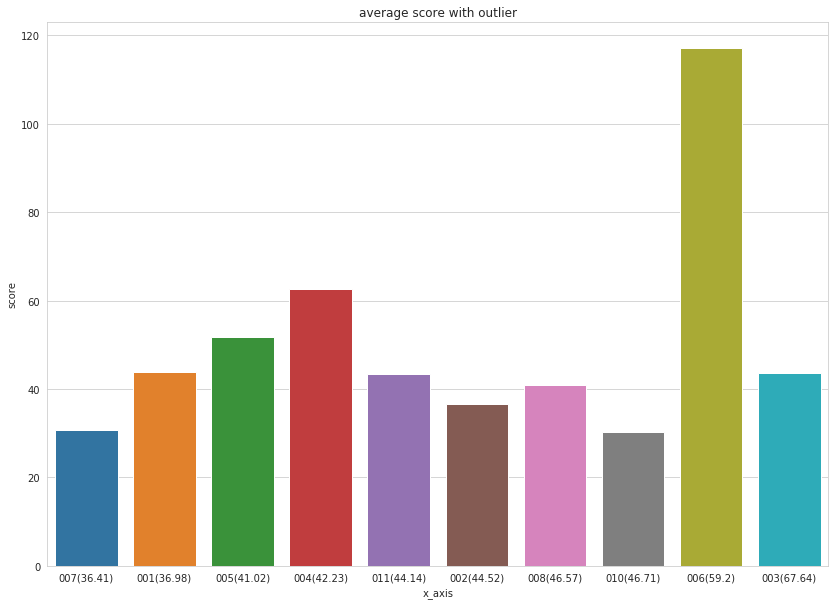

In [5]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))
ax = sns.barplot(x="x_axis", y="score", data=df_tmp,ci=0).set_title('average score with outlier')


## with the same order, that in Oliver's experiment

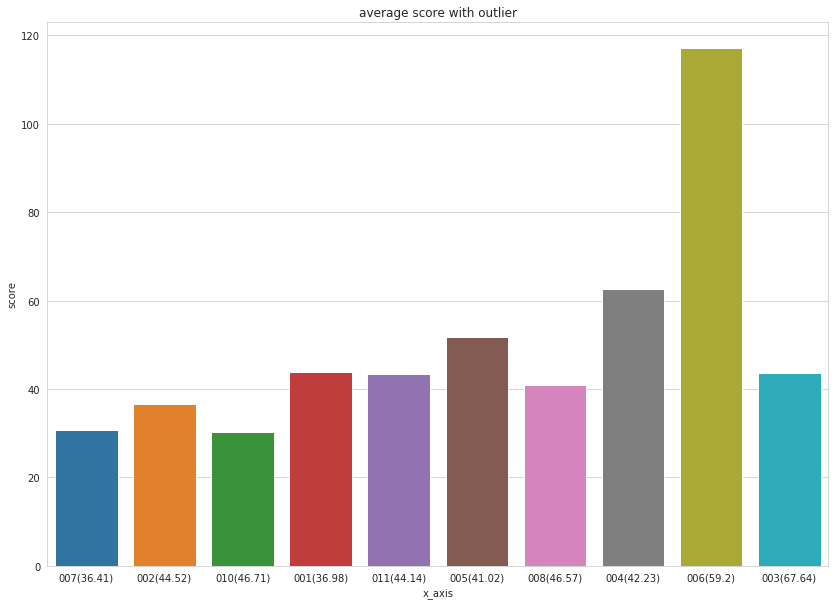

In [6]:
df_tmp = df_tmp.reindex([6,1,8,0,9,4,7,3,5,2])
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="score", data=df_tmp,ci=0).set_title('average score with outlier')


In [7]:
df_tmp = df_nnp.groupby(['uid']).mean()
df_tmp = df_tmp.drop(['avg_len_force', 'score2'], axis=1)
df_tmp = df_tmp.reset_index(drop=False)
df_tmp = df_tmp.sort_values('avg_force')
df_tmp['avg_force'] = df_tmp['avg_force'].apply(lambda x: round(x, 2))
df_tmp['cos_force'] = df_tmp['cos_force'].apply(lambda x: round(x, 2))
df_tmp['x_axis'] = df_tmp['avg_force'].astype('str')
df_tmp['x_axis2'] = df_tmp['cos_force'].astype('str')
df_tmp['x_axis'] = df_tmp['uid'] + '('+ df_tmp['x_axis']+')' 
df_tmp['x_axis2'] = df_tmp['uid'] + '('+ df_tmp['x_axis2']+')' 
df_tmp['score'] = df_tmp['score']/2
df_tmp

,uid,avg_force,score,cos_force,x_axis,x_axis2
6,007,36.41,30.633798,22.63,007(36.41),007(22.63)
0,001,36.98,43.814827,17.87,001(36.98),001(17.87)
4,005,41.02,51.766548,22.04,005(41.02),005(22.04)
3,004,42.23,62.672275,26.75,004(42.23),004(26.75)
9,011,44.14,72.247980,25.72,011(44.14),011(25.72)
1,002,44.52,36.576576,20.44,002(44.52),002(20.44)
7,008,46.57,56.736449,22.84,008(46.57),008(22.84)
8,010,46.71,35.618272,14.26,010(46.71),010(14.26)
5,006,59.20,117.103007,29.66,006(59.2),006(29.66)
2,003,67.64,65.603769,32.96,003(67.64),003(32.96)


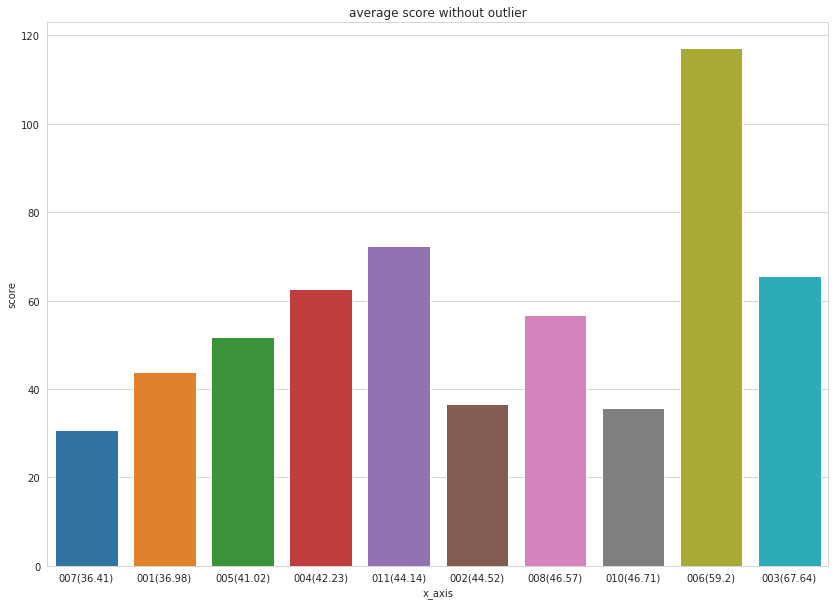

In [8]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))
ax = sns.barplot(x="x_axis", y="score", data=df_tmp,ci=0).set_title('average score without outlier')


## with the same order, that in Oliver's experiment

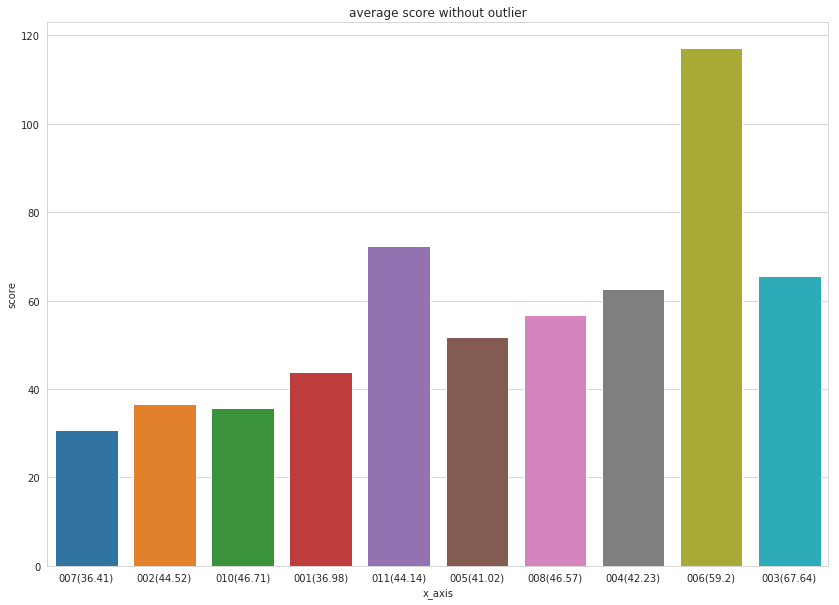

In [9]:
df_tmp = df_tmp.reindex([6,1,8,0,9,4,7,3,5,2])
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="score", data=df_tmp,ci=0).set_title('average score without outlier')


# Diagram 6.3 Performance improvement throughout the training session week 

In [10]:
"""
# reorder exc_num
# [day, exc_num]
tmp_d1 = [[1, i+1] for i in xrange(7)]
tmp_d2 = [[2,i+1] for i in xrange(8)]
tmp_d3 = [[3,i+1] for i in xrange(8)]
tmp_d4 = [[4,i+1] for i in xrange(8)]
tmp_d5 = [[5,i+1] for i in xrange(11)]
original_exc_num = tmp_d2 + tmp_d3 + tmp_d4 + tmp_d5
tmp = [1,0,2,3,4,5,6]
tmp_d1 = [[1,i] for i in tmp]
tmp = [2,3,4,6,8,9,10,11]
tmp_d2 = [[2,i] for i in tmp]
tmp = [8,9,10,11,12,13,14,15]
tmp_d3 = [[3,i] for i in tmp]
tmp = [12,13,14,15,16,17,18,19]
tmp_d4 = [[4,i] for i in tmp]
tmp = [12,7,8,9,10,13,14,16,17,18,19]
tmp_d5 = [[5,i] for i in tmp]
reordered_exc_num = tmp_d2 + tmp_d3 + tmp_d4 + tmp_d5


days = ['1_tag/', '2_tag/', '3_tag/', '4_tag/', '5_tag/']
df = pd.DataFrame()
for i, day in enumerate(days):
    data_dir = '../data/old_data/'+day
    filenames = os.listdir(data_dir)
    
    for filename in filenames:
        data_path = data_dir + filename
        df_tmp = pd.read_csv(data_path)
        df_tmp = df_tmp.drop(['Force Input', 'Disturbance Force', 'Velocity','Distance'], axis=1)
        if len(df_tmp)==0:
            df_tmp = pd.concat([df_tmp, df[0:1]])
            df_tmp[0:1] = np.nan


        p = '(^heika)(\d*)(\_)(d)(\d)(\_)(e)(\d*)(\_)(\d)'
        result = re.match(p, filename)
        uid = result.groups()[1]
        d = result.groups()[4]
        exc_num = result.groups()[7]
        exc_times = result.groups()[9]
        
        # replace exc_num
        d = int(d)
        exc_num = int(exc_num)
        exc_times = int(exc_times)
        if [d, exc_num] in original_exc_num:
            index = original_exc_num.index([d, exc_num])
            d, exc_num = reordered_exc_num[index]
            
        df_tmp['day'] = d
        df_tmp['exc_num'] = exc_num
        df_tmp['exc_times'] = exc_times
        df_tmp['uid'] = uid
        
#         df_tmp['force'] = df_tmp['Fx']**2 + df_tmp['Fy']**2 + df_tmp['Fz']**2
#     #     df_tmp['force'] = (df_tmp['Fx']+df_tmp['Fx.1'])**2 + (df_tmp['Fy']+df_tmp['Fy.1'])**2 + (df_tmp['Fz']+df_tmp['Fz.1'])**2
#         df_tmp['force'] = df_tmp['force'].pow(1/2)
    #     df_tmp['disturbance_force'] = df_tmp['Fx.1']**2 + df_tmp['Fy.1']**2 + df_tmp['Fz.1']**2
    #     df_tmp['disturbance_force'] = df_tmp['disturbance_force'].pow(1/2)



    ############# calc force projection on velocity ###############
    #     force_3d = df_tmp[['Fx', 'Fy', 'Fz']].values
    #     velocity_3d = df_tmp[['Lx', 'Ly', 'Lz']].values
    #     score = []
    #     for i in xrange(len(df_tmp)):
    #         score.append(np.dot(force_3d[i], velocity_3d[i]))
    #     df_tmp['force'] = df_tmp['score']/df_tmp['velocity']


    #############  calc length of vector velocity  ####################
#         df_tmp['velocity'] = df_tmp['Lx']**2 + df_tmp['Ly']**2 + df_tmp['Lz']
#         df_tmp['velocity'] = df_tmp['velocity'].pow(1/2)


    ############# calc score   ###################################
    #     df_tmp['score'] = pd.Series(score)
#         df_tmp['score'] = df_tmp['front']*df_tmp['velocity']


    #############################################################################
#         df_tmp = df_tmp.drop(['left', 'right', 'Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz','Fx.1', 'Fy.1', 'Fz.1', 
#                       'Mx.1', 'My.1', 'Mz.1','Lx', 'Ly', 'Lz', 'Ax', 'Ay', 'Az'], axis=1)
        
        df = pd.concat([df, df_tmp])
        
        
df.to_csv('../data/all_data.csv', index=False)
#"""
df = pd.read_csv('../data/all_data.csv')

In [11]:
print(df.columns)
df.info()

Index(['Ax', 'Ay', 'Az', 'Fx', 'Fx.1', 'Fy', 'Fy.1', 'Fz', 'Fz.1', 'Lx', 'Ly',
       'Lz', 'Mx', 'Mx.1', 'My', 'My.1', 'Mz', 'Mz.1', 'day', 'exc_num',
       'exc_times', 'front', 'left', 'right', 'uid'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005930 entries, 0 to 4005929
Data columns (total 25 columns):
Ax           float64
Ay           float64
Az           float64
Fx           float64
Fx.1         float64
Fy           float64
Fy.1         float64
Fz           float64
Fz.1         float64
Lx           float64
Ly           float64
Lz           float64
Mx           float64
Mx.1         float64
My           float64
My.1         float64
Mz           float64
Mz.1         float64
day          int64
exc_num      int64
exc_times    int64
front        float64
left         float64
right        float64
uid          int64
dtypes: float64(21), int64(4)
memory usage: 764.1 MB


In [12]:
df = calc_force(df)
df = calc_velocity(df)
df = calc_score(df)
df = df.drop(['left', 'right', 'Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz','Fx.1', 'Fy.1', 'Fz.1', 
                      'Mx.1', 'My.1', 'Mz.1','Lx', 'Ly', 'Lz', 'Ax', 'Ay', 'Az'], axis=1)
df_nnp = df.dropna()

In [13]:
df_6_3 = df[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day', 'exc_num', 'exc_times', 'uid']).sum()
df_6_3_nnp = df_nnp[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day', 'exc_num', 'exc_times', 'uid']).sum()
df_6_3 = df_6_3.reset_index()
df_6_3_nnp = df_6_3_nnp.reset_index()
# df_6_3 = df_6_3[['day', 'exc_num', 'exc_times', 'score']].groupby(['day', 'exc_num', 'exc_times']).mean()
# df_6_3_nnp = df_6_3_nnp[['day', 'exc_num', 'exc_times', 'score']].groupby(['day', 'exc_num', 'exc_times']).mean()
# df_6_3 = df_6_3.reset_index()
# df_6_3_nnp = df_6_3_nnp.reset_index()

first_attempt = df_6_3.groupby(['uid', 'exc_num']).head(1)
first_attempt_nnp = df_6_3_nnp.groupby(['uid', 'exc_num']).head(1)
first_attempt = first_attempt.reset_index()
first_attempt_nnp = first_attempt_nnp.reset_index()

last_attempt = df_6_3.groupby(['uid','exc_num']).tail(1)
last_attempt_nnp = df_6_3_nnp.groupby(['uid', 'exc_num']).tail(1)
last_attempt = last_attempt.reset_index()
last_attempt_nnp = last_attempt_nnp.reset_index()

last_repetition = df_6_3.merge(first_attempt, on=['uid', 'day', 'exc_num'], how='inner')
last_repetition_nnp = df_6_3_nnp.merge(first_attempt_nnp, on=['uid', 'day', 'exc_num'], how='inner')
last_repetition = last_repetition.groupby(['uid', 'exc_num']).tail(1)
last_repetition_nnp = last_repetition_nnp.groupby(['uid', 'exc_num']).tail(1)
last_repetition = last_repetition.drop(['index', 'exc_times_x', 'exc_times_y', 'score_y'], axis=1)
last_repetition_nnp = last_repetition_nnp.drop(['index', 'exc_times_x', 'exc_times_y', 'score_y'], axis=1)
last_repetition.columns = ['day', 'exc_num', 'uid', 'score']
last_repetition_nnp.columns = ['day', 'exc_num', 'uid', 'score']

first_attempt = first_attempt[['exc_num', 'score']].groupby(['exc_num']).mean()
first_attempt = first_attempt.reset_index()
first_attempt_nnp = first_attempt_nnp[['exc_num', 'score']].groupby(['exc_num']).mean()
first_attempt_nnp = first_attempt_nnp.reset_index()

last_attempt = last_attempt[['exc_num', 'score']].groupby(['exc_num']).mean()
last_attempt = last_attempt.reset_index()
last_attempt_nnp = last_attempt_nnp[['exc_num', 'score']].groupby(['exc_num']).mean()
last_attempt_nnp = last_attempt_nnp.reset_index()

last_repetition = last_repetition[['exc_num', 'score']].groupby(['exc_num']).mean()
last_repetition = last_repetition.reset_index()
last_repetition_nnp = last_repetition_nnp[['exc_num', 'score']].groupby(['exc_num']).mean()
last_repetition_nnp = last_repetition_nnp.reset_index()

first_attempt['level'] = 'first attempt'
last_attempt['level'] = 'last attempt'
last_repetition['level'] = 'last repetition in the day of the first attempt'

first_attempt_nnp['level'] = 'first attempt'
last_attempt_nnp['level'] = 'last attempt'
last_repetition_nnp['level'] = 'last repetition in the day of the first attempt'

cols = ['exc_num', 'level', 'score']
df_6_3 = pd.concat([first_attempt[cols], last_repetition[cols], last_attempt[cols]])
df_6_3_nnp = pd.concat([first_attempt_nnp[cols], last_repetition_nnp[cols], last_attempt_nnp[cols]])
df_6_3_nnp

,exc_num,level,score
0,1,first attempt,49.017001
1,2,first attempt,13.551276
2,3,first attempt,17.580101
3,4,first attempt,62.329893
4,5,first attempt,97.011338
5,6,first attempt,56.176334
6,7,first attempt,28.668774
7,8,first attempt,158.991648
8,9,first attempt,145.902881
9,10,first attempt,291.503817


[Text(0.5,0,'exercise index')]

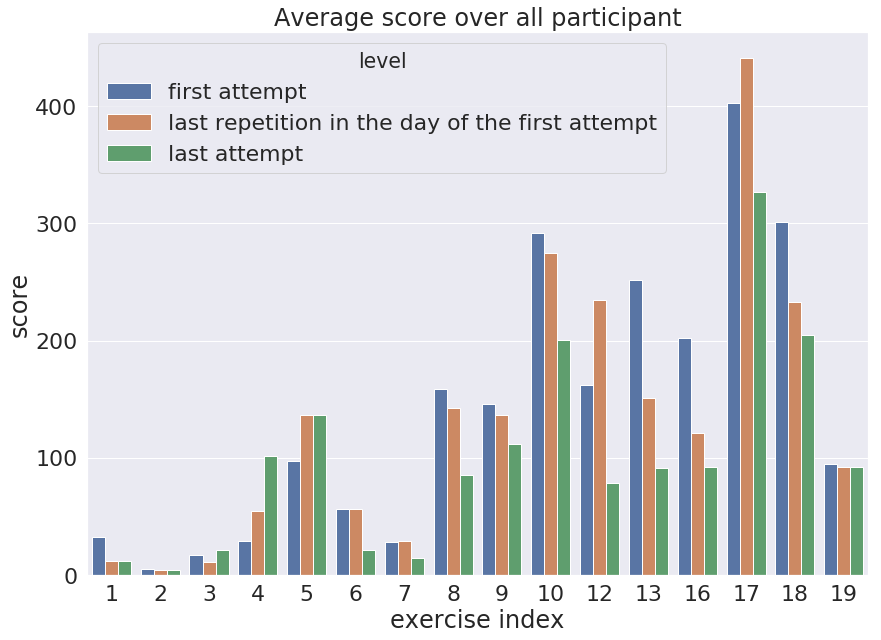

In [14]:
sns.set_style('whitegrid')
sns.set(font_scale=2)
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="score", hue='level', data=df_6_3,ci=0)
ax.set_title('Average score over all participant')
ax.set(xlabel='exercise index')


In [15]:
"""selector = [[20, "1.8|5.2"],[8,"2.1|5.3"], [9, "2.2|5.4"], [10, "2.3|5.5"], [13, "3.2|5.6"], [16, "4.1|5.8"], [17,"4.2|5.9"], [18, "4.3|5.10"]]
df_tmp = pd.DataFrame()
for element in selector:
    num, string = element
    df_curr = df_6_3_nnp[df_6_3_nnp['exc_num']==num]
    df_curr['exc_num'] = string
    df_tmp = pd.concat([df_tmp, df_curr])
    
df_tmp"""

'selector = [[20, "1.8|5.2"],[8,"2.1|5.3"], [9, "2.2|5.4"], [10, "2.3|5.5"], [13, "3.2|5.6"], [16, "4.1|5.8"], [17,"4.2|5.9"], [18, "4.3|5.10"]]\ndf_tmp = pd.DataFrame()\nfor element in selector:\n    num, string = element\n    df_curr = df_6_3_nnp[df_6_3_nnp[\'exc_num\']==num]\n    df_curr[\'exc_num\'] = string\n    df_tmp = pd.concat([df_tmp, df_curr])\n    \ndf_tmp'

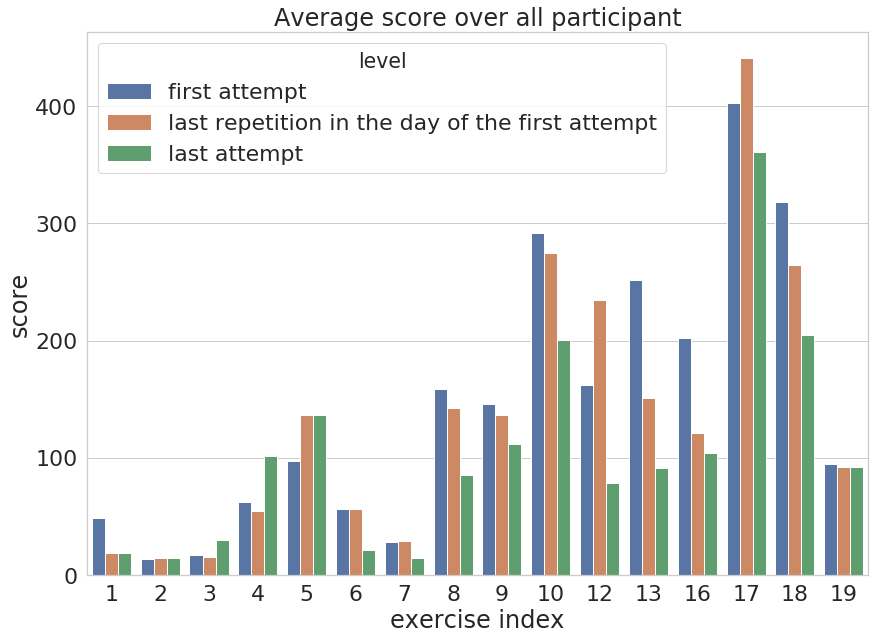

In [16]:
sns.set(font_scale=2)
sns.set_style('whitegrid')

f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="score", hue='level', data=df_6_3_nnp)
ax.set_title('Average score over all participant')
ax.set(xlabel='exercise index')


plt.savefig("../data/figure/fig_6_3_reorder_average_score_over_all_participator_with_title.png")

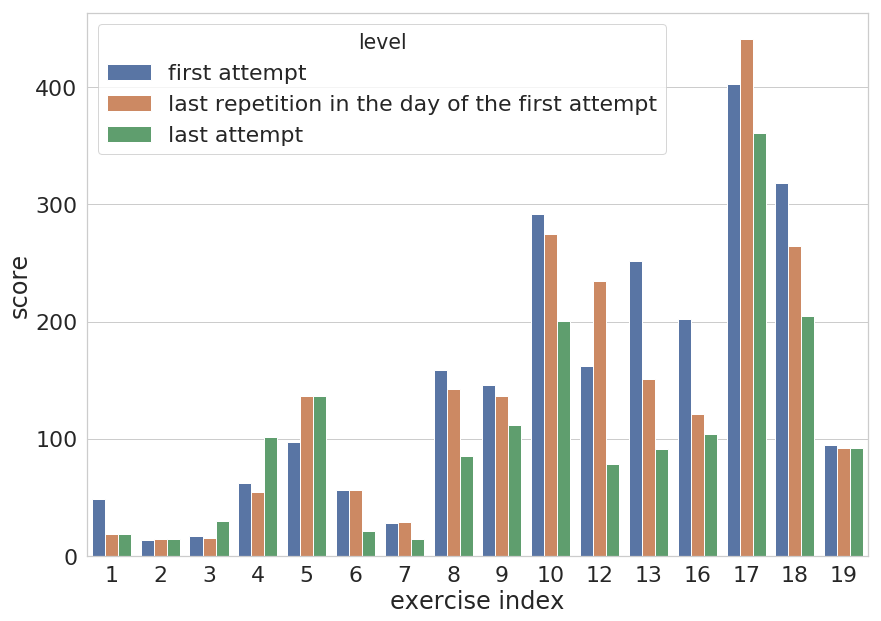

In [17]:
sns.set_style('whitegrid')

f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="score", hue='level', data=df_6_3_nnp)
ax.set(xlabel='exercise index')


plt.savefig("../data/figure/fig_6_3_reorder_average_score_over_all_participator_without_title.png")

# Diagram 6.4 Whisker box 

In [18]:
df_6_4 = df[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day', 'exc_num', 'exc_times', 'uid']).sum()
df_6_4_nnp = df_nnp[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day', 'exc_num', 'exc_times', 'uid']).sum()
df_6_4 = df_6_4.reset_index()
df_6_4_nnp = df_6_4_nnp.reset_index()

first_attempt = df_6_4.groupby(['exc_num', 'uid']).head(1)
first_attempt_nnp = df_6_4_nnp.groupby(['exc_num', 'uid']).head(1)
first_attempt = first_attempt.reset_index()
first_attempt_nnp = first_attempt_nnp.reset_index()

last_attempt = df_6_4.groupby(['exc_num', 'uid']).tail(1)
last_attempt_nnp = df_6_4_nnp.groupby(['exc_num', 'uid']).tail(1)
last_attempt = last_attempt.reset_index()
last_attempt_nnp = last_attempt_nnp.reset_index()

first_attempt['level'] = 'first attempt'
last_attempt['level'] = 'last attempt'

first_attempt_nnp['level'] = 'first attempt'
last_attempt_nnp['level'] = 'last attempt'

cols = ['uid', 'day', 'exc_num', 'level', 'score']
df_6_4 = pd.concat([first_attempt[cols], last_attempt[cols]])
df_6_4_nnp = pd.concat([first_attempt_nnp[cols], last_attempt_nnp[cols]])

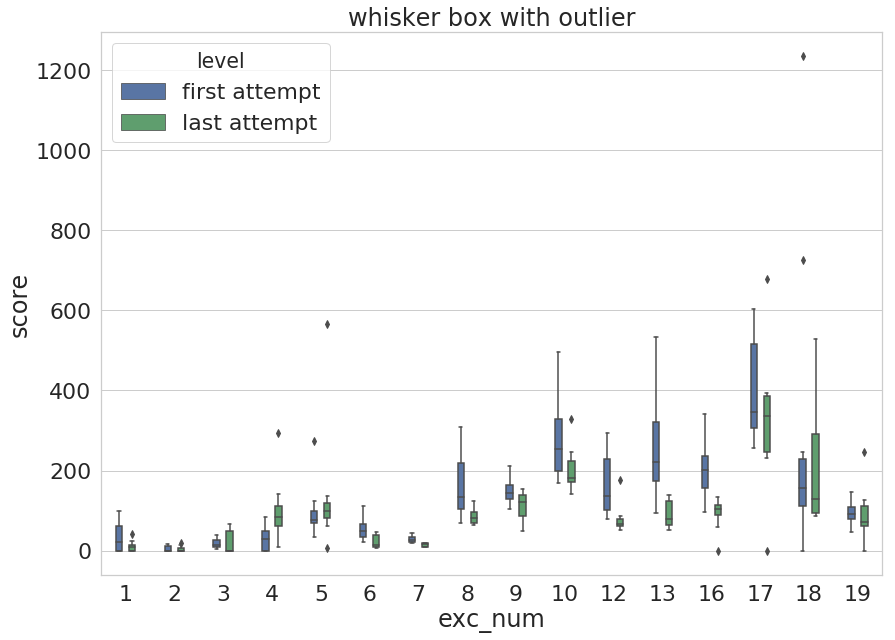

In [19]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.boxplot(x="exc_num", y="score", hue='level',hue_order=['first attempt', '', 'last attempt'], width=0.4, data=df_6_4).set_title('whisker box with outlier')

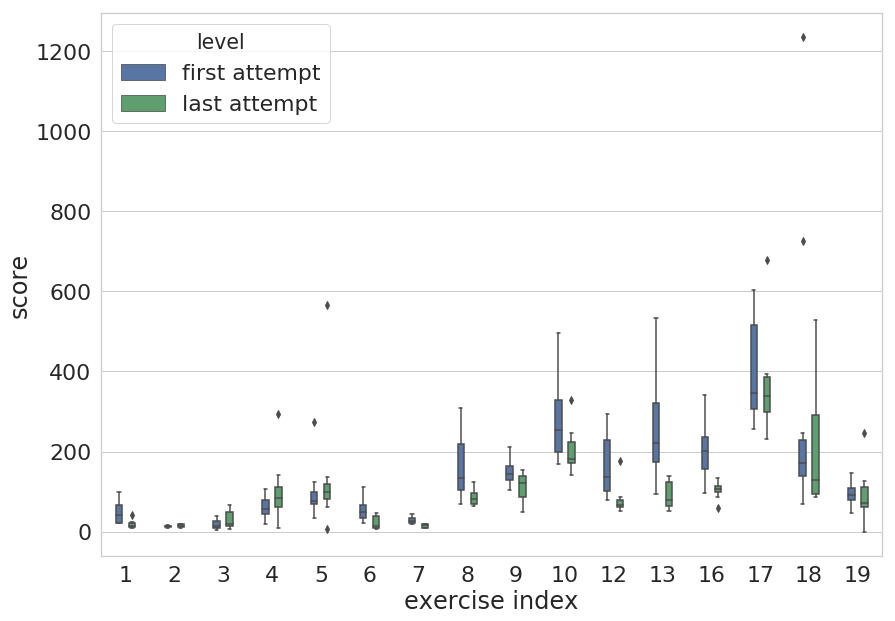

In [20]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.boxplot(x="exc_num", y="score", hue='level',hue_order=['first attempt', '', 'last attempt'], width=0.4, data=df_6_4_nnp)
ax.set(xlabel='exercise index')
plt.savefig("../data/figure/fig_6_4_whisker_box_score_without_title.png")

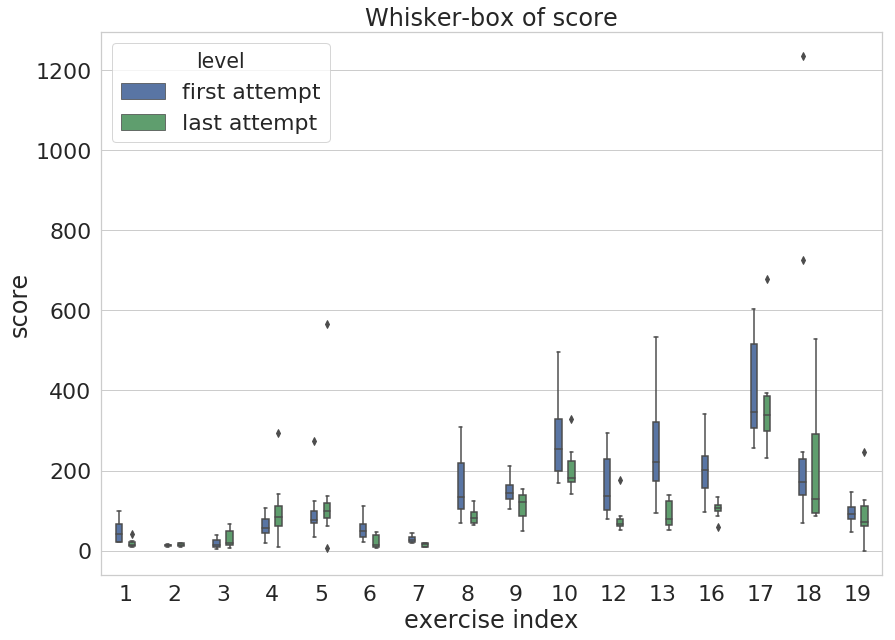

In [21]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.boxplot(x="exc_num", y="score", hue='level',hue_order=['first attempt', '', 'last attempt'], width=0.4, data=df_6_4_nnp)
ax.set(xlabel='exercise index')
ax.set_title('Whisker-box of score')
plt.savefig("../data/figure/fig_6_4_whisker_box_score_with_title.png")

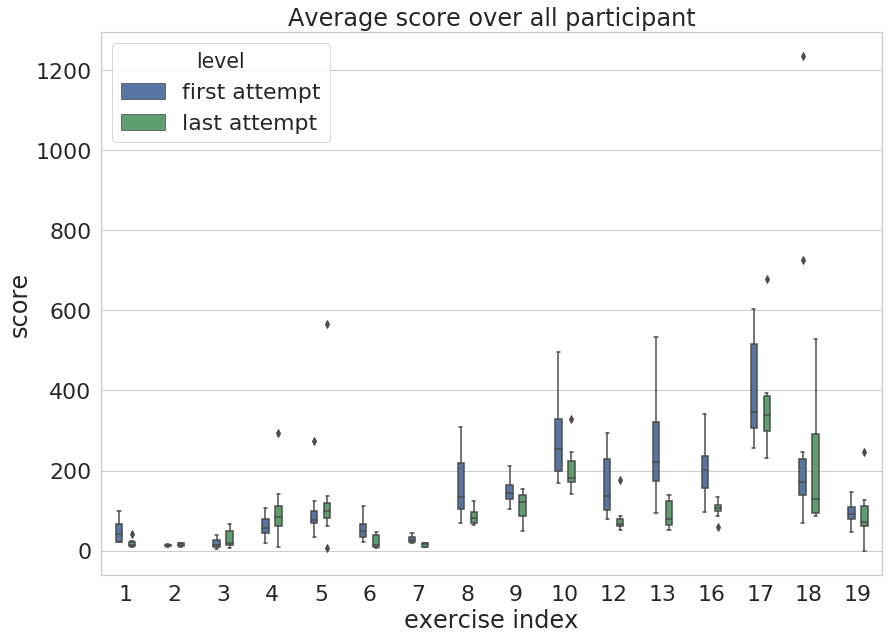

In [22]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.boxplot(x="exc_num", y="score", hue='level',hue_order=['first attempt', '', 'last attempt'], width=0.4, data=df_6_4_nnp)
ax.set(xlabel='exercise index')
ax.set_title('Average score over all participant')
plt.savefig("../data/figure/fig_6_4_whisker_box_score_with)same_title.png")

# Diagram 6.5 Timing Measurements

In [23]:
"""
dir = '../data/'
filenames = ['tag 1', 'tag 2', 'tag 3', 'tag 4', 'tag 5']
# init 
exc_content = {}
is_part = False
b_get_csv = False
df = pd.DataFrame([], columns=['uid', 'day', 'exc_num', 'exc_times', 'running_time'])

for filename in filenames:
    filename = dir+filename
    with open(filename, 'r') as f:
        for line in f:
            b_get_csv = False
            if line.startswith('tag'):
                p_day = '(^tag )(\d+)'
                result = re.match(p_day, line)
                day = result.groups()[1]
                week = None
                uid = None
                start_time = None
                
            elif line.startswith('HEiKA'):
                p_uid = '(^HEiKA)(\d*)'
                result = re.match(p_uid, line)
                uid = result.groups()[1]
            elif line.startswith('start_time'):
                p_start_time = '(^start_time: )(.*)'
                result = re.match(p_start_time, line)
                start_time = result.groups()[1]
  
            elif line.startswith('e'):
                p_exc = '(^e)(\d*)(.)(.*)'
                result = re.match(p_exc, line)
                char = result.groups()[2]
                num = result.groups()[1]
                if char == ':':
                    content = result.groups()[3][1:]
                    exc_content[num] = content

                elif char == ' ':
                    b_get_csv = True
                    exc_num = num
                    infos = result.groups()[3].split(' ')
                    if infos[1].startswith('part'):
                        is_part = True
                        exc_times = infos[0][1:]
                        part_num = infos[1][-2]
                        s_time = time_to_sec(infos[2])
                        e_time = time_to_sec(infos[4])

                    else:
                        is_part = False
                        exc_times = infos[0][1:-1]
                        s_time = time_to_sec(infos[1])
                        e_time = time_to_sec(infos[3])
                        
            if b_get_csv:
                row = [uid, day, exc_num, exc_times, e_time-s_time]
                df_tmp = pd.DataFrame(np.array(row).reshape(1,-1),columns=['uid', 'day', 'exc_num', 'exc_times', 'running_time'])
                df = pd.concat([df, df_tmp], axis=0)
                
df.to_csv('../data/running_time.csv', index=False)
#"""
df = pd.read_csv('../data/running_time.csv')


In [24]:
df_6_5 = df.groupby(['uid', 'day', 'exc_num', 'exc_times']).sum()
df_6_5 = df_6_5.reset_index()

first_attempt = df_6_5.groupby(['uid', 'exc_num']).head(1)
first_attempt = first_attempt.reset_index()

last_attempt = df_6_5.groupby(['uid','exc_num']).tail(1)
last_attempt = last_attempt.reset_index()


last_repetition = df_6_5.merge(first_attempt, on=['uid', 'day', 'exc_num'], how='inner')
last_repetition = last_repetition.groupby(['uid', 'exc_num']).tail(1)
last_repetition = last_repetition.drop(['index', 'exc_times_x', 'exc_times_y', 'running_time_y'], axis=1)
last_repetition.columns = ['uid', 'day', 'exc_num', 'running_time']

first_attempt = first_attempt[['exc_num', 'running_time']].groupby(['exc_num']).mean()
first_attempt = first_attempt.reset_index()

last_attempt = last_attempt[['exc_num', 'running_time']].groupby(['exc_num']).mean()
last_attempt = last_attempt.reset_index()

last_repetition = last_repetition[['exc_num', 'running_time']].groupby(['exc_num']).mean()
last_repetition = last_repetition.reset_index()

first_attempt['level'] = 'first attempt'
last_attempt['level'] = 'last attempt'
last_repetition['level'] = 'last repetition in the day of the first attempt'

cols = ['exc_num', 'level', 'running_time']
df_6_5 = pd.concat([first_attempt[cols], last_repetition[cols], last_attempt[cols]])
df_6_5

,exc_num,level,running_time
0,1,first attempt,76.666667
1,2,first attempt,55.500000
2,3,first attempt,73.200000
3,4,first attempt,134.200000
4,5,first attempt,83.000000
5,6,first attempt,48.900000
6,7,first attempt,46.000000
7,8,first attempt,107.800000
8,9,first attempt,118.900000
9,10,first attempt,127.100000


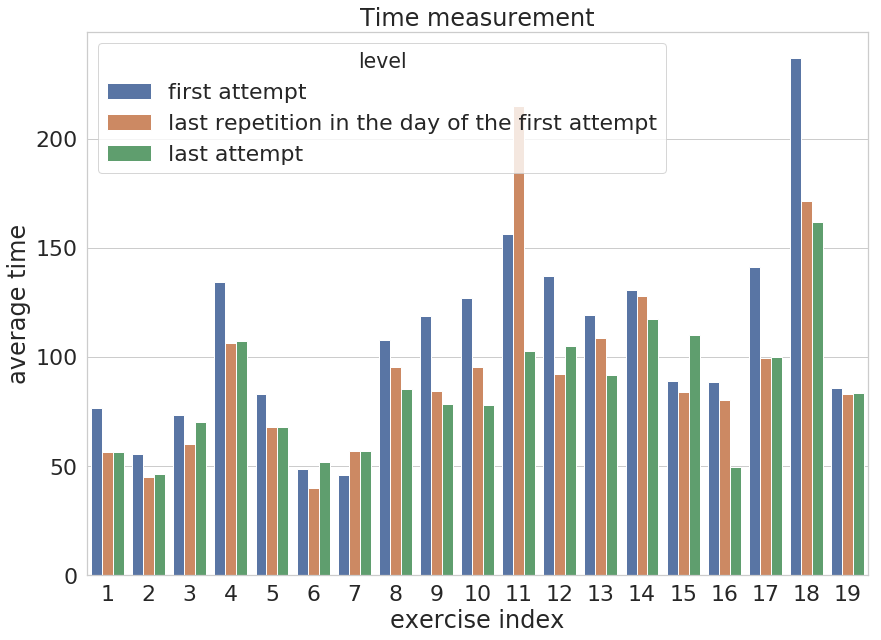

In [25]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="running_time", hue='level', data=df_6_5)

ax.set_title('Time measurement')
ax.set(xlabel='exercise index', ylabel='average time')

plt.savefig("../data/figure/fig6_3_average_time_over_all_participator_with_title.png")

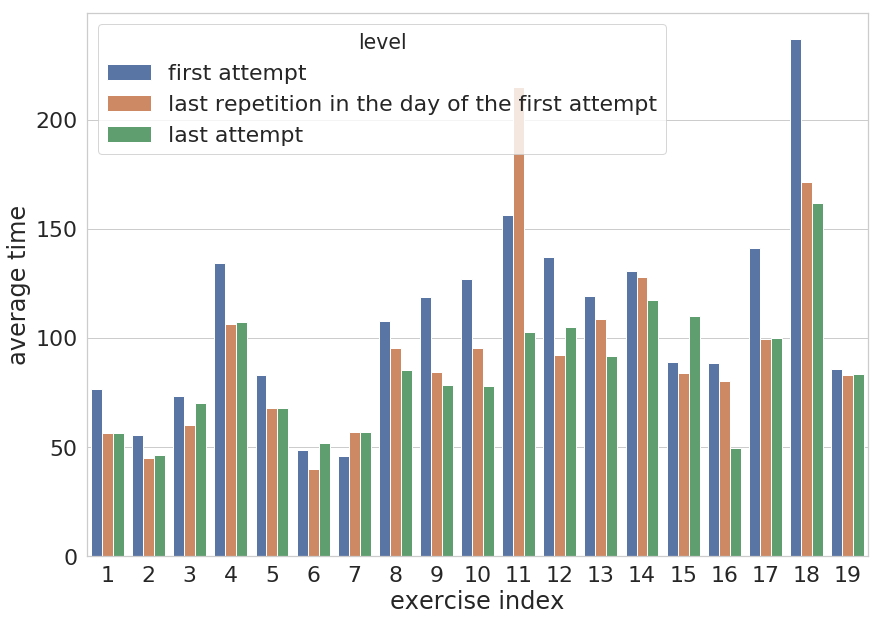

In [26]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="running_time", hue='level', data=df_6_5)

ax.set(xlabel='exercise index', ylabel='average time')

plt.savefig("../data/figure/fig6_3_average_time_over_all_participator_without_title.png")

# Diagram 6.6 Whisker box 

In [27]:
df_6_6 = df.groupby(['uid', 'day', 'exc_num', 'exc_times']).sum()
df_6_6 = df_6_6.reset_index()

first_attempt = df_6_6.groupby(['uid', 'exc_num']).head(1)
first_attempt = first_attempt.reset_index()

last_attempt = df_6_6.groupby(['uid','exc_num']).tail(1)
last_attempt = last_attempt.reset_index()


last_repetition = df_6_6.merge(first_attempt, on=['uid', 'day', 'exc_num'], how='inner')
last_repetition = last_repetition.groupby(['uid', 'exc_num']).tail(1)
last_repetition = last_repetition.drop(['index', 'exc_times_x', 'exc_times_y', 'running_time_y'], axis=1)
last_repetition.columns = ['uid', 'day', 'exc_num', 'running_time']

first_attempt['level'] = 'first attempt'
last_attempt['level'] = 'last attempt'
last_repetition['level'] = 'last repetition in the day of the first attempt'

cols = ['uid', 'exc_num', 'level', 'running_time']
df_6_6 = pd.concat([first_attempt[cols], last_attempt[cols]])
df_6_6

,uid,exc_num,level,running_time
0,1,1,first attempt,108.0
1,1,2,first attempt,59.0
2,1,3,first attempt,83.0
3,1,4,first attempt,139.0
4,1,5,first attempt,111.0
5,1,6,first attempt,64.0
6,1,8,first attempt,94.0
7,1,9,first attempt,111.0
8,1,10,first attempt,122.0
9,1,11,first attempt,552.0


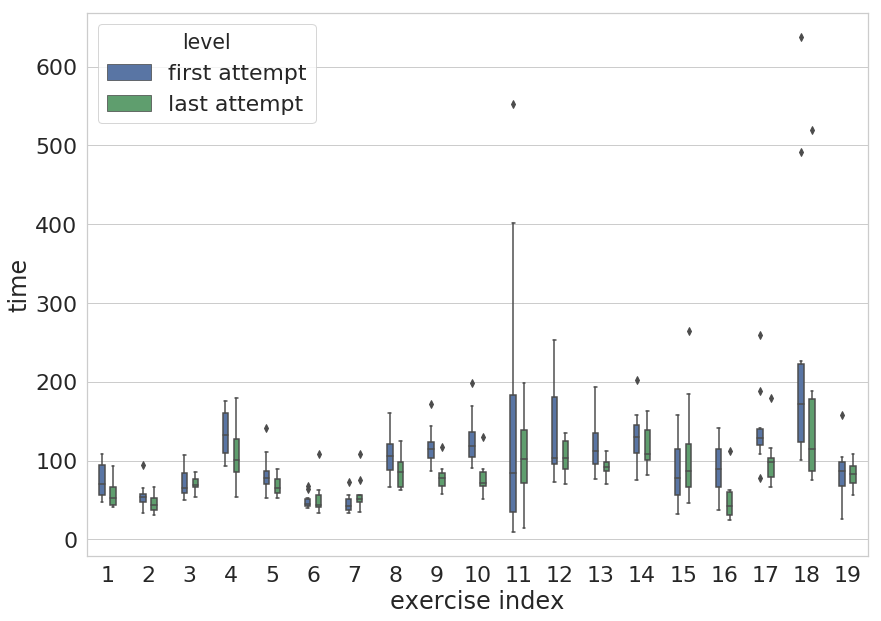

In [28]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

# ax = sns.boxplot(x="exc_num", y="running_time", hue='level', data=df_6_6)

ax = sns.boxplot(x="exc_num", y="running_time", hue='level',hue_order=['first attempt', '', 'last attempt'], width=0.4, data=df_6_6)
ax.set(xlabel='exercise index', ylabel='time')
plt.savefig("../data/figure/fig6_6_whisker_box_time.png")

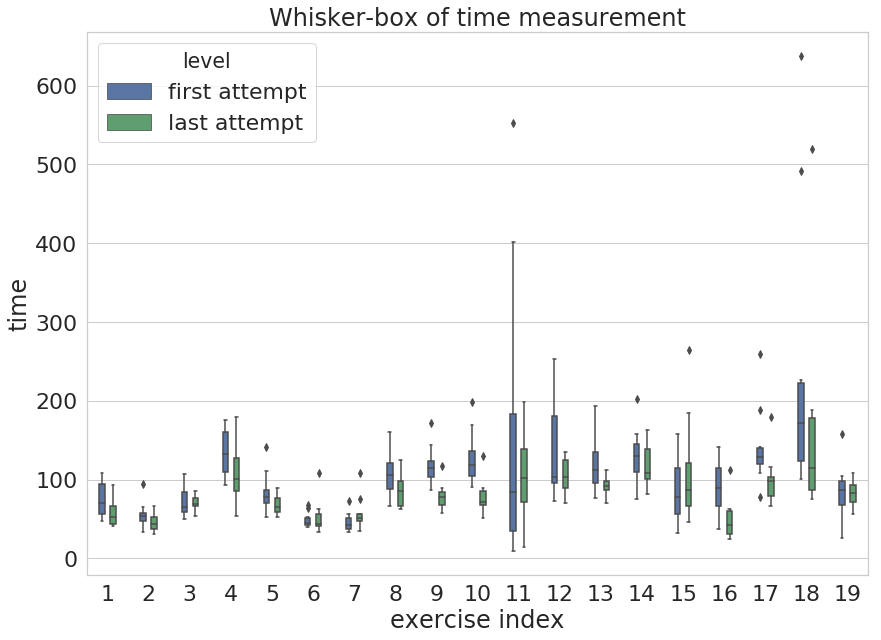

In [29]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

# ax = sns.boxplot(x="exc_num", y="running_time", hue='level', data=df_6_6)

ax = sns.boxplot(x="exc_num", y="running_time", hue='level',hue_order=['first attempt', '', 'last attempt'], width=0.4, data=df_6_6)
ax.set(xlabel='exercise index', ylabel='time')
ax.set_title('Whisker-box of time measurement')
plt.savefig("../data/figure/fig6_6_whisker_box_time_with_title.png")

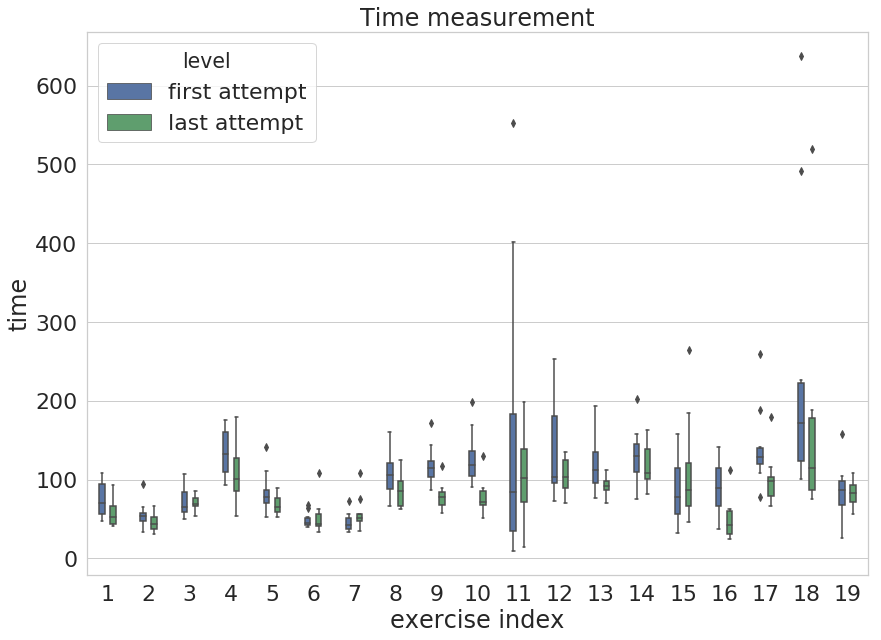

In [30]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

# ax = sns.boxplot(x="exc_num", y="running_time", hue='level', data=df_6_6)

ax = sns.boxplot(x="exc_num", y="running_time", hue='level',hue_order=['first attempt', '', 'last attempt'], width=0.4, data=df_6_6)
ax.set(xlabel='exercise index', ylabel='time')
ax.set_title('Time measurement')
plt.savefig("../data/figure/fig6_6_whisker_box_time_with_same_title.png")

# Diagram 6.7 Correlation between score and time

In [31]:
df_score = pd.read_csv('../data/all_data.csv')
df_score = calc_force(df_score)
df_score = calc_velocity(df_score)
df_score = calc_score(df_score)
df_score = df_score.drop(['left', 'right', 'Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz','Fx.1', 'Fy.1', 'Fz.1', 
                      'Mx.1', 'My.1', 'Mz.1','Lx', 'Ly', 'Lz', 'Ax', 'Ay', 'Az'], axis=1)
df_score_nnp = df_score.dropna()

df_score = df_score[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day', 'exc_num', 'exc_times', 'uid']).sum()
df_score_nnp = df_score_nnp[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day', 'exc_num', 'exc_times', 'uid']).sum()
df_score = df_score.reset_index()
df_score_nnp = df_score_nnp.reset_index() 
df_score
df_time = pd.read_csv('../data/running_time.csv')
df_time = df_time.groupby(['uid', 'day', 'exc_num', 'exc_times']).sum()
df_time = df_time.reset_index()

df_6_7 = df_time.merge(df_score, on=['uid', 'day', 'exc_num', 'exc_times'], how='inner')
df_6_7 = df_6_7[['uid', 'running_time', 'score']]
df_6_7_nnp = df_time.merge(df_score_nnp, on=['uid', 'day', 'exc_num', 'exc_times'], how='inner')
df_6_7_nnp = df_6_7_nnp[['uid', 'running_time', 'score']]
df_6_7_nnp.head()

,uid,running_time,score
0,1,108.0,21.747808
1,1,78.0,14.700025
2,1,72.0,9.963524
3,1,83.0,6.354035
4,1,78.0,6.829834


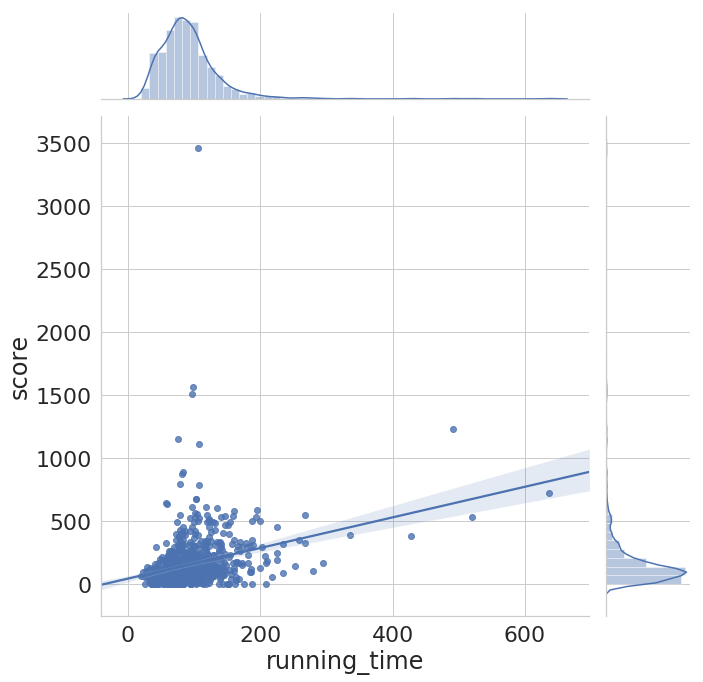

In [32]:
# sns.set_style('whitegrid')
# f, ax= plt.subplots(figsize = (14, 10))

# g  = sns.jointplot(x="running_time", y="score", data=df_6_7, kind="reg")
g = sns.JointGrid(x="running_time", y="score", data=df_6_7, height=10)
g = g.plot(sns.regplot, sns.distplot)

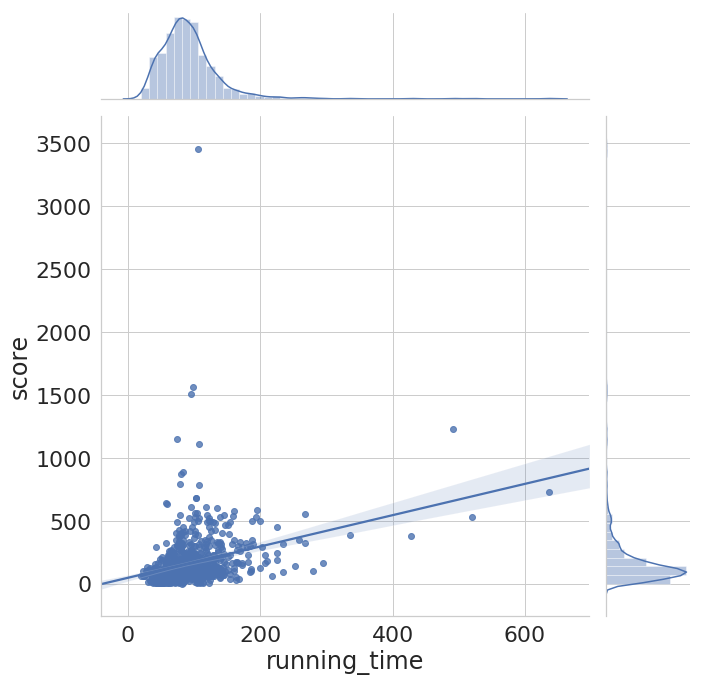

In [33]:
g = sns.JointGrid(x="running_time", y="score", data=df_6_7_nnp, height=10)
g = g.plot(sns.regplot, sns.distplot)

# Exercise with and without force 

In [34]:
df_6_8 = df_nnp[(df_nnp['exc_num']==12) | (df_nnp['exc_num']==13)]
df_6_8_velocity = df_6_8[['uid', 'velocity']].groupby(['uid']).mean()
df_6_8_score = df_6_8[['exc_num', 'exc_times', 'uid', 'score']].groupby(['exc_num', 'exc_times', 'uid']).sum()
df_6_8_score = df_6_8_score.reset_index()
df_6_8_score = df_6_8_score[['uid', 'exc_num', 'score']].groupby(['uid', 'exc_num']).mean()
df_6_8_score = df_6_8_score.reset_index()
df_6_8 = df_6_8_score.merge(df_6_8_velocity, on=['uid'], how='inner')
df_6_8 = df_6_8.reset_index()
df_6_8 = df_6_8.sort_values('velocity')
df_6_8['velocity'] = df_6_8['velocity'].apply(lambda x: round(x, 2))
df_6_8['uid'] = df_6_8['uid'].astype('str').apply(lambda x: x.zfill(3))
df_6_8['x_axis'] = df_6_8['velocity'].astype('str')
df_6_8['x_axis'] = df_6_8['x_axis'] + '(' + df_6_8['uid'] + ')'

df_6_8['exc_num'][df_6_8['exc_num']==12] = 'without force'
df_6_8['exc_num'][df_6_8['exc_num']==13] = 'with force'
df_6_8['Exercise'] = df_6_8['exc_num']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


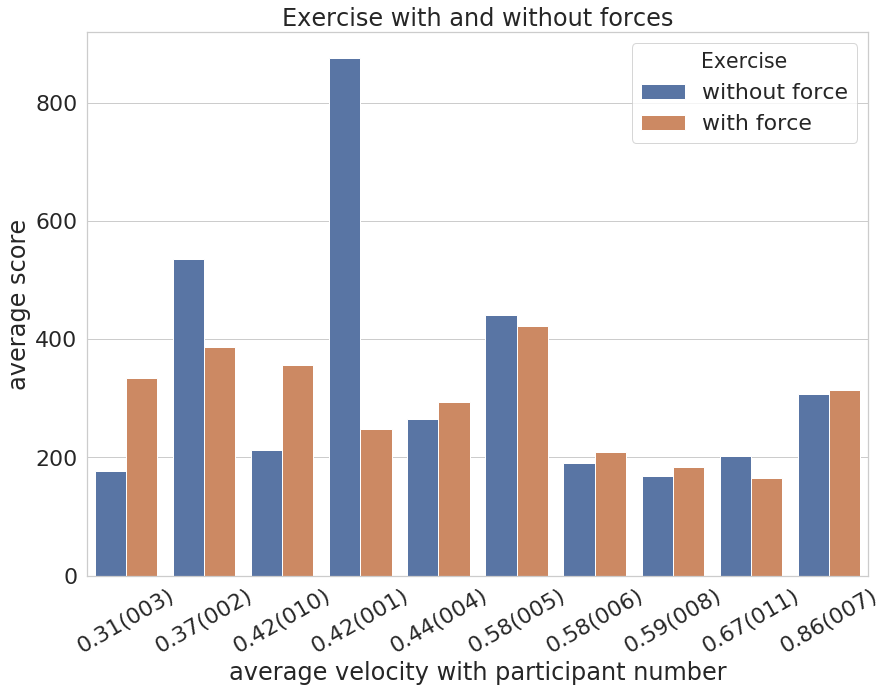

In [35]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="score", hue='Exercise', data=df_6_8)
ax.set_title('Exercise with and without forces')
ax.set(xlabel='average velocity with participant number', ylabel='average score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.savefig("../data/figure/fig6_8_average_score_c5_with_title.png", bbox_inches='tight')


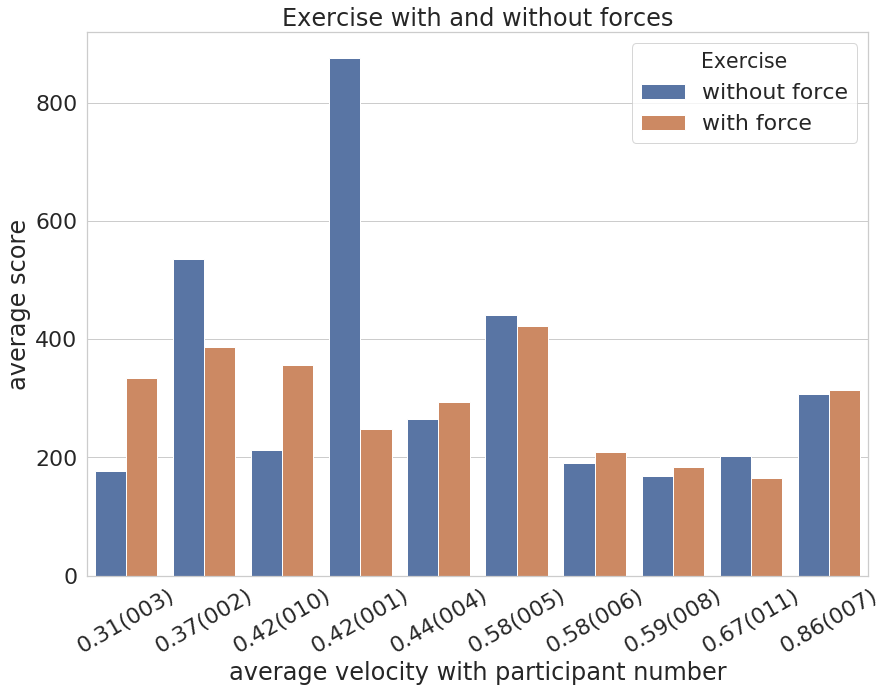

In [36]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="score", hue='Exercise', data=df_6_8)
ax.set_title('Exercise with and without forces')
ax.set(xlabel='average velocity with participant number', ylabel='average score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.savefig("../data/figure/fig6_8_average_score_c5_without_title.png", bbox_inches='tight')
